<a href="https://colab.research.google.com/github/ayten21/Kaggle_Bike_Sharing/blob/main/Kaggle_Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import sklearn
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn import ensemble

In [2]:
df = pd.read_csv('train (1).csv')

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df['date'] = pd.to_datetime(df['datetime'])

In [6]:
df.set_index('date', inplace = True)

In [7]:
df['month'] = df.index.month
df['hours'] = df.index.hour
df['dayOfWeek'] = df.index.weekday


In [8]:
class mean_30():
  def __init__(self, df):
    self.df = df
  def mean_hours_min(self, h):
    a = self.df['hours'] == h 
    return self.df[a]['count'].mean()
  def transf(self, t):
    return self.mean_hours_min(t)
  def transfc(self, t):
    return self.err_hours_min(t) 
  def vector_day(self):
    k = []
    for i in range (0,24):
      k.append(i)
    hour_day = pd.DataFrame()
    hour_day['A'] = k
    return hour_day['A']
  def view(self):
    plt.plot(self.vector_day().apply(self.transf))

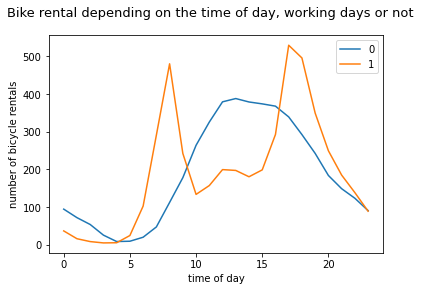

In [9]:
fig = plt.figure()
fig.suptitle('Bike rental depending on the time of day, working days or not', fontsize = 13)
plt.ylabel('number of bicycle rentals')
plt.xlabel('time of day')
moy0 = mean_30(df[df['workingday'] == 0])
moy0.view()
moy1 = mean_30(df[df['workingday'] == 1])
moy1.view()
plt.legend(['0','1'])
plt.show()

In [10]:
j = 0

In [11]:
class std_30():
    def __init__(self, df):
        self.df=df
    def mean_hours_std(self,j,h):
        y = self.df[self.df["dayOfWeek"]==j]["hours"] == h
        return self.df[self.df["dayOfWeek"]==j][y]["count"].mean()
    def err_hours(self,j,h):
        y = self.df[self.df["dayOfWeek"]==j]["hours"] == h
        return self.df[self.df["dayOfWeek"]==j][y]["count"].std()
    def transf_err(self,t):
        return self.mean_hours_std(j,t)
    def transf_err2(self,t):
        return self.err_hours(j,t)
    def vector_day(self):
        k = []
        for i in range(0,24):
            k.append(i)
        hour_std = pd.DataFrame()
        hour_std["A"] = k
        return hour_std["A"] 
    def view(self):
        errors=self.vector_day().apply(self.transf_err2)
        fig, ax = plt.subplots()
        self.vector_day().apply(self.transf_err).plot(yerr=errors, ax=ax,label=str(j))
        plt.legend('0',loc=2,prop={'size':9})

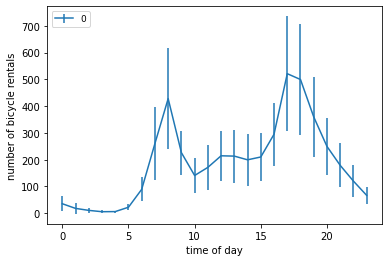

In [12]:
fig.suptitle('Standard deviation of bike rentals according to the hour', fontsize=13)
std0=std_30(df)
std0.view()
plt.ylabel('number of bicycle rentals')
plt.xlabel('time of day')
plt.show()

In [13]:
class month_30():
    def __init__(self, df):
        self.df=df
    def mean_hours_min(self,m):
        a = self.df["month"] == m
        return self.df[a]["count"].mean() 
    def transf(self, t):
        return self.mean_hours_min(t)
    def transfc(self, t):
        return self.err_hours_min(t)
    def vector_day(self):
        k = []
        for i in range(0,13):
            k.append(i)
        hour_day = pd.DataFrame()
        hour_day["A"] = k
        return hour_day["A"] 
    def view(self):
        plt.plot(self.vector_day().apply(self.transf))

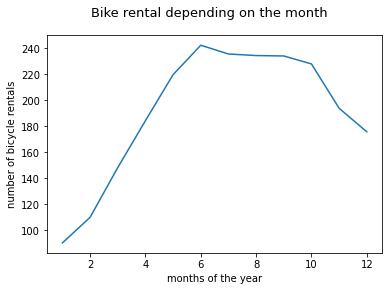

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
fig=plt.figure()
fig.suptitle('Bike rental depending on the month', fontsize=13)
moy0=month_30(df)
moy0.view()
plt.ylabel('number of bicycle rentals')
plt.xlabel('months of the year')
plt.show()
plt.figure()

In [15]:
D = {u'V>13k/h':df[df['windspeed']>13]['count'].mean(), 
     u'V<13k/h': df[df['windspeed']<13]['count'].mean(), 
     u'T<24°C':df[df['atemp']<24]['count'].mean(), 
     u'T>24°C':df[df['atemp']>24]['count'].mean(), 
     u'H>62%': df[df['humidity']>62]['count'].mean(), 
     u'H<62%':df[df['humidity']<62]['count'].mean()
    }

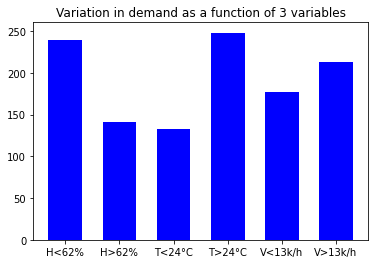

In [16]:
od = collections.OrderedDict(sorted(D.items()))
width = 1/1.6
plt.figure()
plt.bar(range(len(od)), od.values(),width,color="blue",align='center')
plt.xticks(range(len(od)), od.keys())
plt.title('Variation in demand as a function of 3 variables')
plt.show()

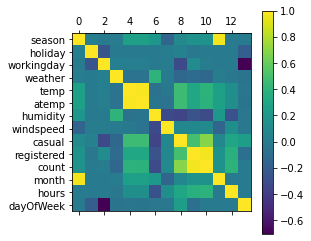

In [17]:
df.corr()
plt.matshow(df.corr())
plt.yticks(range(len(df.corr().columns)), df.corr().columns); 
plt.colorbar()
plt.show()

In [18]:
df1=df.drop(['workingday','datetime','season','atemp','holiday','registered','casual'],axis=1)
target=df1['count'].values
train=df1.drop('count',axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.33, random_state=42)

In [20]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [21]:
linreg=linear_model.LinearRegression()
linreg.fit(X_train,Y_train)
tableau=[['Paramètre', 'Coefficient']] 
col=list(train.columns.values)
for i in range(7):
    tableau.append([col[i],linreg.coef_[i]])

In [22]:
print ("Training Score Regression Linéare : ", str(linreg.score(X_train,Y_train)))
print ("Test Score Regression Linéare : " , str(linreg.score(X_test,Y_test)))
print ("Coefficients Regression Linéare :")
print (tableau)

Training Score Regression Linéare :  0.33714622910676395
Test Score Regression Linéare :  0.33352764224301534
Coefficients Regression Linéare :
[['Paramètre', 'Coefficient'], ['weather', -0.7690205222965788], ['temp', 6.757640439864008], ['humidity', -2.28180150175948], ['windspeed', 0.08976529088764573], ['month', 8.093135974422186], ['hours', 7.778992607675706], ['dayOfWeek', -0.17464994747914064]]


In [23]:
gbr = ensemble.GradientBoostingRegressor(n_estimators=2000)
gbr.fit(X_train,Y_train)
print ("Training Score GradientBoosting: ", str(gbr.score(X_train,Y_train)))
print ("Test Score GradientBoosting: " , str(gbr.score(X_test,Y_test)))

Training Score GradientBoosting:  0.9127458259025475
Test Score GradientBoosting:  0.8563663955168377


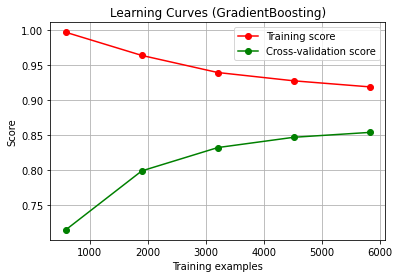

In [24]:
title = "Learning Curves (GradientBoosting)"
estimator = ensemble.GradientBoostingRegressor(n_estimators=2000)
plot_learning_curve(estimator, title, X_train, Y_train)
plt.show()

In [26]:
svr=svm.SVR(kernel='linear')
svr.fit(X_train,Y_train)
print ("Training Score SVR: ", str(svr.score(X_train,Y_train)))
print ("Test Score SVR : " , str(svr.score(X_test,Y_test)))

Training Score SVR:  0.29161019866765087
Test Score SVR :  0.2921859792559355


In [27]:
rf=ensemble.RandomForestRegressor(n_estimators=30,oob_score=True)
rf.fit(train,target)
print ("Training Score RandomForest: ", str(rf.score(train,target)))
print ("OOB Score RandomForest: " , str(rf.oob_score_))

Training Score RandomForest:  0.9785165750022082
OOB Score RandomForest:  0.8503485296829276


In [29]:
def param_import():
    col=list(train.columns.values)
    index1=linreg.coef_.argsort()[-2:][-1]
    index2=linreg.coef_.argsort()[-2:][0]
    print("For the improvements, let's calculate the most influential parameters : ")
    print('...')
    print('For linear regression, the most influential parameters are :', col[index1],' and ',col[index2])
    index3=rf.feature_importances_.argsort()[-2:][-1] 
    index4=rf.feature_importances_.argsort()[-2:][0] 
    print('For the RF algorithm, the most influential parameters are :', col[index3],' and ',col[index4])
    index5=gbr.feature_importances_.argsort()[-2:][-1]
    index6=gbr.feature_importances_.argsort()[-2:][0]
    print('For the Gradient Boosting algorithm, the most influential parameters are :', col[index5],' and ',col[index6])
    if index3==index5:
        plus_import=index3
    elif index5==index4:
        plus_import=index4
    return plus_import

In [30]:
print('The most important parameter is therefore : ', col[param_import()])

For the improvements, let's calculate the most influential parameters : 
...
For linear regression, the most influential parameters are : month  and  hours
For the RF algorithm, the most influential parameters are : hours  and  temp
For the Gradient Boosting algorithm, the most influential parameters are : hours  and  temp
The most important parameter is therefore :  hours


In [31]:
soir = df[df['hours'].isin([17,18,19])]
peak_soir=soir[soir['workingday']==1]
matin = df[df['hours'].isin([7,8,9])]
peak_matin=matin[matin['workingday']==1]
we = df[df['hours'].isin([12,13,14,15,16])]
peak_we=we[we['workingday']==0]

In [32]:
print('Then calculate the average number of bikes for several time slots : ')
print('...')
print('The total demand average is : ', df['count'].mean())
print('Weekdays, between 5 p.m. and 7 p.m. : ', peak_soir['count'].mean())
print('During the week, between 7 and 9 a.m. : ', peak_matin['count'].mean())
print('Weekends, between 12 p.m. and 4 p.m. : ', peak_we['count'].mean())

Then calculate the average number of bikes for several time slots : 
...
The total demand average is :  191.57413191254824
Weekdays, between 5 p.m. and 7 p.m. :  457.9924973204716
During the week, between 7 and 9 a.m. :  337.64301075268816
Weekends, between 12 p.m. and 4 p.m. :  377.40275862068967
